In [1]:
from framework import FrameWork
from survival_probablity import PseudoDirac
#from framework import BorexinoRecoilSpectrum
from framework import SuperkPrediction


import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex']=True
plt.style.use('classic')


In [2]:
frame  = FrameWork()
param  = {'T12' : 34.,
          'T13' : 8.57, 
          'mum1': 0. ,
          'mum2': 1.5e-12 ,
          'mum3': 0. ,
          'M12' : 7.54e-5 }

pee,pes,distance = PseudoDirac(param,frame.energy_nu)

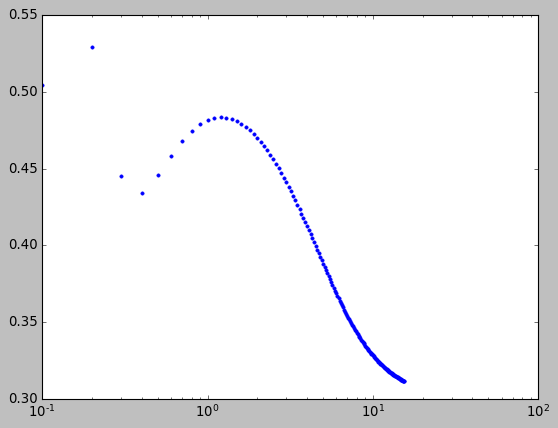

In [3]:
plt.xscale('log')
plt.plot(frame.energy_nu,pee[0],'.')

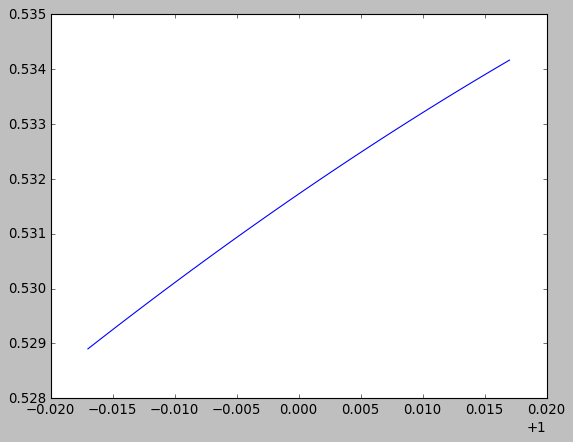

In [4]:
plt.plot(distance,pee[:,1])

In [6]:
total_event = frame[pee,pes,distance]

In [19]:
# su_pr = 1*np.ones(155)

# total_days = frame.total_days
# su_pr = np.ones((total_days,1))*su_pr[np.newaxis,:]

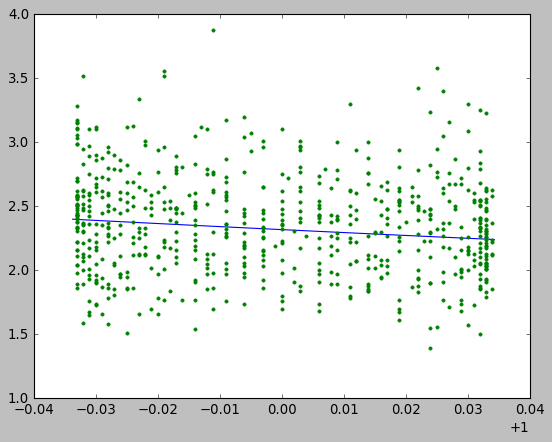

In [8]:
plt.plot(distance**2,total_event,'-')
plt.plot(frame.data[:,6],frame.data[:,3],'.')

[22.38793799]


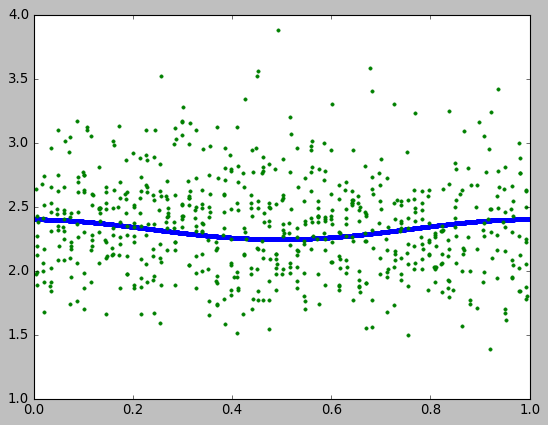

In [21]:
plt.plot(frame.day,total_event,'.')
print(frame.borom_unoscilated_total)
plt.plot(np.mod(frame.data[:,0],365.25)/365.25,frame.data[:,3],'.')

In [6]:
flux,dist,day = SuperkPrediction(frame.data,frame.total_days,total_event,frame.distance,frame.day)

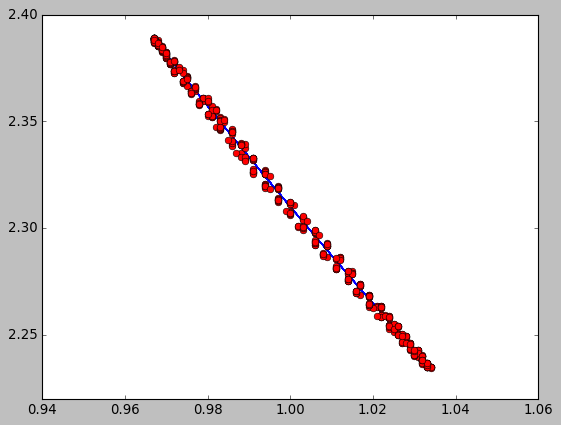

In [7]:
plt.xlim(0.94,1.06)
plt.plot(frame.distance**2,0.44*total_event,'b-')
#plt.plot(frame.data[:,6],frame.data[:,3],'g.')
plt.plot(frame.data[:,6],0.44*flux,'ro')


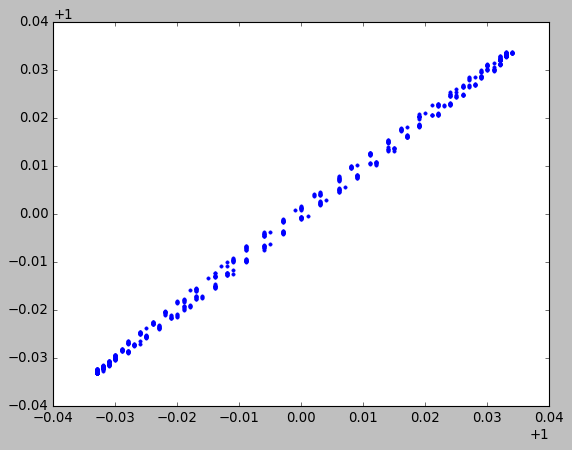

In [8]:
#plt.xlim(0,500)
#plt.plot(np.arange(0,frame.total_days,1),frame.distance**2)
#plt.plot(frame.data[:,0],frame.data[:,6],'g.')
#plt.plot(frame.data[:,0],dpredict**2,'r.')

plt.plot(frame.data[:,6],dist**2,'.')

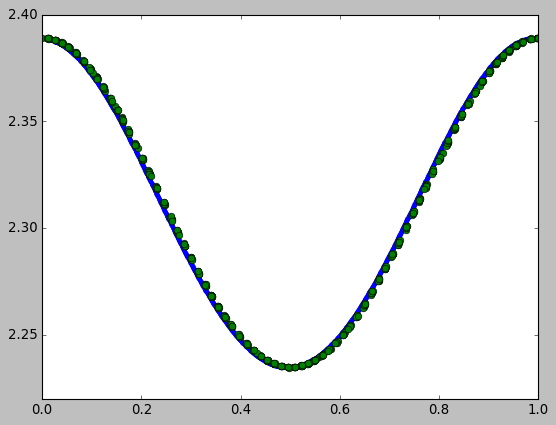

In [9]:
plt.plot(frame.day,0.44*total_event,'b.')
#plt.plot(lpredict,frame.data[:,3],'.')
plt.plot(day,0.44*flux,'go')

In [11]:
print(frame.data[(lpredict>1)&(lpredict<2)&(0.44*bin_predict>2.3),:])

[[5.53154815e+02 2.42537037e+00 2.48776620e+00 2.37000000e+00
  2.60000000e-01 2.80000000e-01 9.94000000e-01 2.35600000e+00
  2.63000000e-01 2.81000000e-01]
 [9.18720139e+02 2.49046296e+00 2.49025463e+00 2.29000000e+00
  3.20000000e-01 3.00000000e-01 9.94000000e-01 2.27700000e+00
  3.20000000e-01 2.96000000e-01]
 [2.38007956e+03 2.49901620e+00 2.49943287e+00 2.20000000e+00
  3.30000000e-01 3.00000000e-01 9.94000000e-01 2.19100000e+00
  3.26000000e-01 3.02000000e-01]]


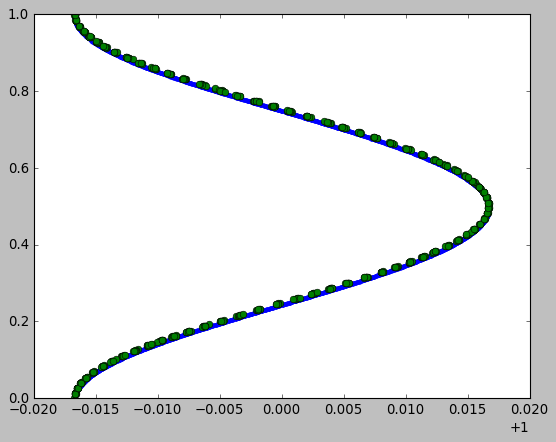

In [15]:
plt.plot(frame.distance,frame.day,'.')
plt.plot(dist,day,'o')